# Wind Energy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

## Wind Power Density

Consider air with density $\rho$ moving through an area $A$ at speed $U$ (in the direction perpendicular to the area $A$). The **mass flow rate** is

$$
\frac{dm}{dt} = \rho A U
$$

and has units M T<sup>-1</sup>. The **kinetic energy** of mass $m$ moving at speed $U$ is given by

$$
KE = \frac{1}{2} m U^2
$$

**Wind power** is the rate of kinetic energy flow of air through the given area and is given by

$$
P = \frac{1}{2} \frac{dm}{dt} U^2 = \frac{ \rho A U^3 }{2}
$$

Wind power generated by a turbine depends on the swept area of the wind turbine blades and so we usually normalize the power by dividing by the area to assess to the **wind power density**:

$$
WPD = \frac{P}{A} = \frac{ \rho U^3 }{2}
$$

## Turbine Power Curve

A wind turbine only captures a fraction of the total wind power available and a turbine usually operates only within a range of wind speeds from the **cut-in wind speed** up to the **cut-out wind speed**. Each turbine has a **power curve** which specifies the power output as a function of wind speed. The curve is usually an $S$-shaped curve from 0kW up to a maximum rated power. For example, the curve below shows data for a [General Electric 2.5-200](https://www.ge.com/renewableenergy/wind-energy/onshore-wind/2mw-platform) wind turbine with cut-in speed 3m/s and cut-out speed 25m/s. The data was taken from [wind-turbine-models.com](https://en.wind-turbine-models.com/turbines/310-ge-general-electric-ge-2.5-120).

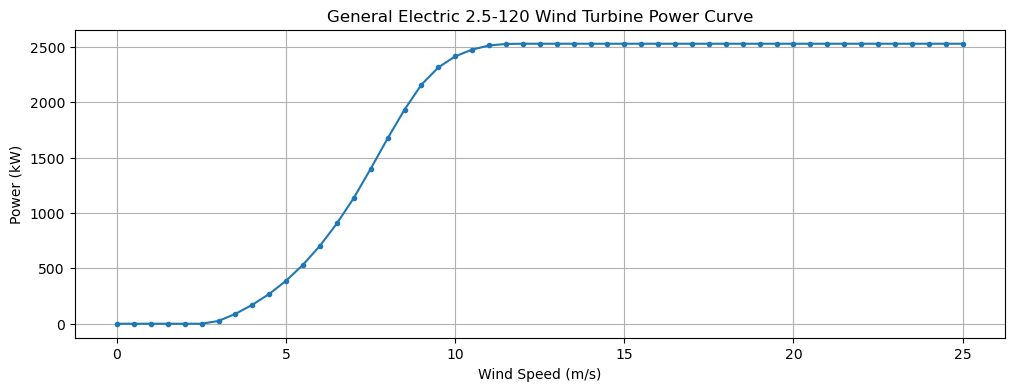

In [46]:
U = np.arange(0,25.5,0.5)
P = np.hstack([[0,0,0,0,0,0,
                25,89,171,269,389,533,704,906,1136,1400,1674,1934,2160,2316,2416,2477,2514,2528],
                2530*np.ones(27)])
plt.figure(figsize=(12,4))
plt.plot(U,P,'.-'), plt.grid(True)
plt.xlabel('Wind Speed (m/s)'), plt.ylabel('Power (kW)')
plt.title('General Electric 2.5-120 Wind Turbine Power Curve')
plt.show()

:::{seealso}
Check out [wind-turbine-models.com](https://en.wind-turbine-models.com/turbines) to see design specifications for different kinds of turbines.
:::

## Estimating Wind Power Generation

Consider a wind turbine with a power curve given by a function $P(U)$ of the wind speed $U$. Wind speed $U$ changes over time $t$ and so the total energy generated from time $t_0$ to $t_f$ is given by

$$
E = \int_{t_0}^{t_f} P(U(t)) \, dt
$$

If we have wind speed measurements $U_0,\dots,U_N$ at intervals $\Delta t = t_{i+1} - t_i$ (where $U_i$ is wind speed at time $t_i$) then the total energy is

$$
E \approx \sum_{i=0}^{N-1} \left( \frac{P(U_{i+1}) + P(U_i)}{2} \right) \, \Delta t
$$

Note that the approximation is given by the trapezoid rule.